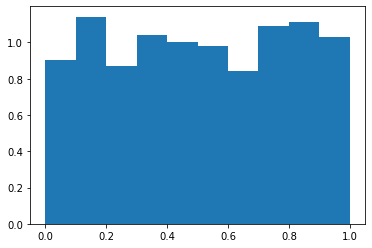

In [1]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1
random = [rng() for i in range(1000)]

import matplotlib.pyplot as plt
import numpy as np
plt.hist(random, density = True)
plt.show()

Time spent generating =  0.002000570297241211


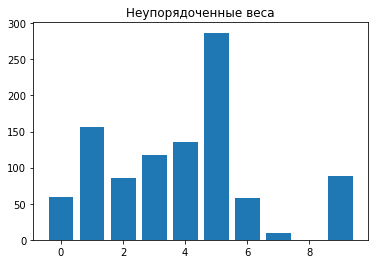

In [2]:
#Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167,
#0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните
#время генерации выборки с неупорядоченными и упорядоченными весами.

import matplotlib.pyplot as plt
import numpy as np
import time
a = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
a/=a.sum()
b = [a[:i].sum() for i in range(1,11)]
r = [np.random.rand() for i in range(1000)]
c = []
start=time.time()
for i in range(1000):
    k=0
    while k!=-1:
        if r[i]<b[k]:
            c.append(k)
            k=-1
        else:
            k+=1
end = time.time()
print("Time spent generating = ", end-start)
plt.bar(np.arange(10), [c.count(i) for i in range(10)])
plt.title("Неупорядоченные веса")
plt.show()

Time spent generating =  0.0019998550415039062


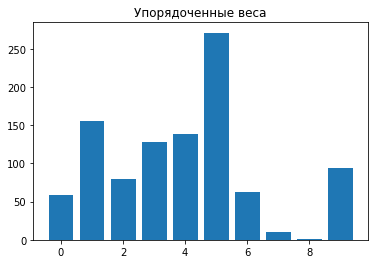

In [3]:
ind = np.argsort(a)[::-1]
a = np.sort(a)[::-1]
b = [a[:i].sum() for i in range(1,11)]
r = [np.random.rand() for i in range(1000)]
c = []
start = time.time()
for i in range(1000):
    k=0
    while k!=-1:
        if r[i]<b[k]:
            c.append(k)
            k=-1
        else:
            k+=1
end = time.time()
print("Time spent generating = ", end-start)
plt.bar(ind, [c.count(i) for i in range(10)])
plt.title("Упорядоченные веса")
plt.show()

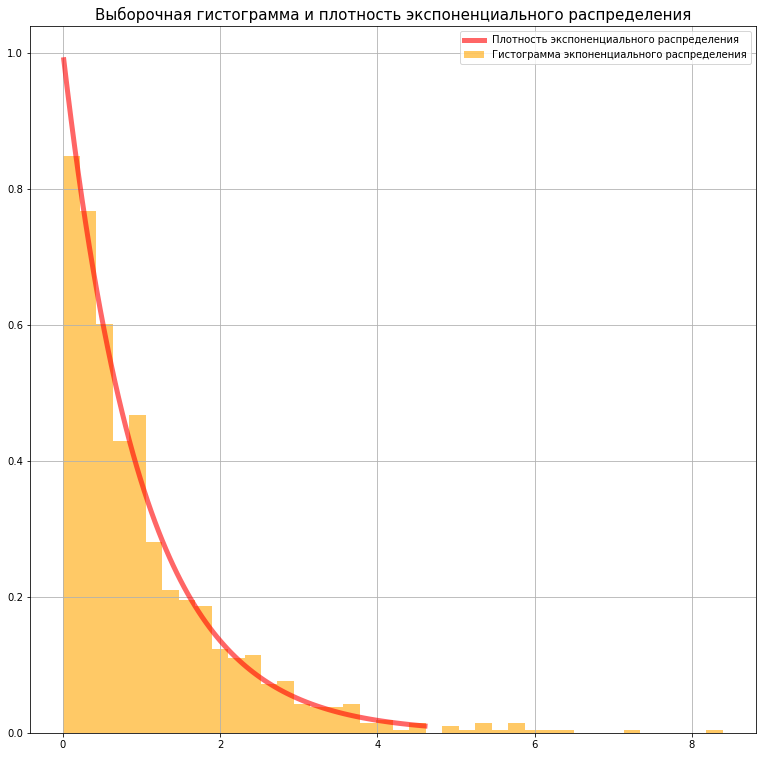

In [4]:
#Смоделируйте выборку размера 1000 из распределения  Exp(λ). Постройте выборочную гистограмму и точный график плотности
#распределения.
import math
from scipy.stats import expon
d = np.array([np.random.rand() for i in range(1000)])
d1 = np.array([-math.log(1-d[i]) for i in range (1000)])

#print(d1)
plt.figure(figsize = (13, 13))
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)
plt.hist(d1, bins = 40, density=True, color = 'orange', alpha = 0.6, label = 'Гистограмма экпоненциального распределения')
plt.legend(loc='upper right')
plt.plot(x, expon.pdf(x), 'r-', lw=5, alpha=0.6, label='Плотность экспоненциального распределения')
plt.legend(loc='upper right')
grid1 = plt.grid(True)
plt.title("Выборочная гистограмма и плотность экспоненциального распределения", size=15)
plt.show()

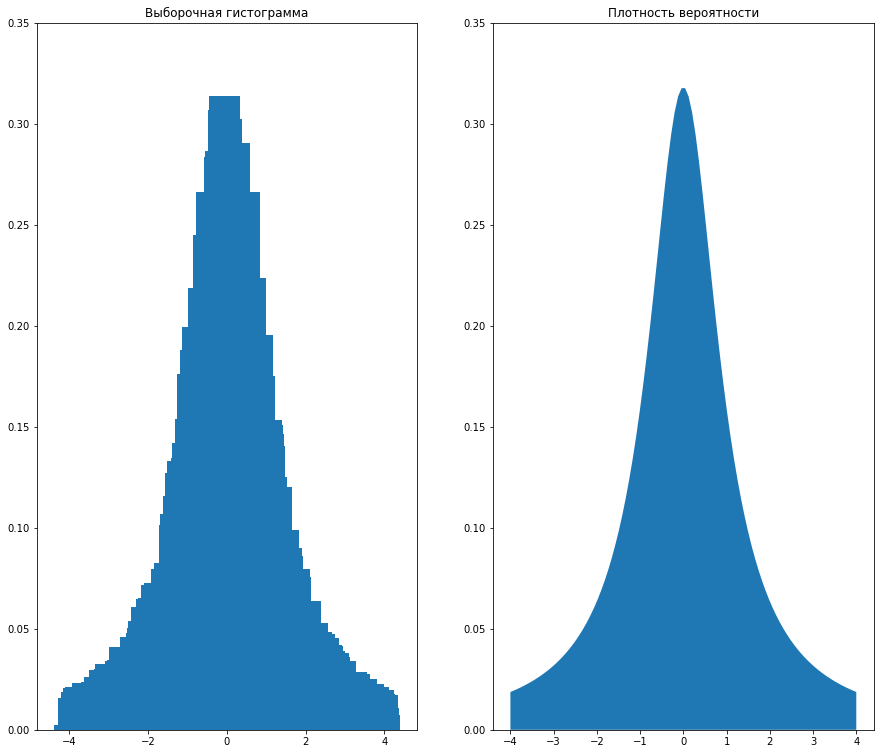

In [5]:
#Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из
#усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной
#выборочной гистограммы и сравните его с графиком точной функции плотности
from scipy import stats
import math
rand = [8*np.random.rand()-4 for i in range(1000)]
rand.sort()
my_cauchy = []
k=0
while k!=1000:
    z = 1/math.pi*np.random.rand()
    if z < 1/(math.pi*(1+rand[k]*rand[k])):
        my_cauchy.append(z)
        k+=1

plt.figure(figsize=(15,13))
plt.subplot(1,2,1)
plt.title("Выборочная гистограмма")
plt.ylim(bottom=0)
plt.ylim(top=0.35)
plt.bar(rand, my_cauchy)

plt.subplot(1,2,2)
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.title("Плотность вероятности")
plt.ylim(bottom=0)
plt.ylim(top=0.35)
plt.fill_between(x, 0, dist.pdf(x))

plt.show()

Обоснование метода:
Плотность p(y|x) = 1 / (c*g(x)). (так, как выбираем равномерно точки при фиксированном x)
-> совместная плотность p(x, y) = p(y|x) * p(x) = 1/c, в силу того,что p(x) = g(x), так как
мы сэмлируем по распределению g.
Совместная плотность x и y под графиком функции f равна p(x,y|y < f) = p(x, y)/ p(y < f) = 1.
Остается заметить, что плотность x при условии y < f, есть интеграл от 0 до f(x) совместной плотности х и у,
и следовательно, равна f(x).

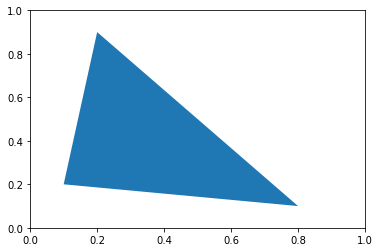

In [6]:
#Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

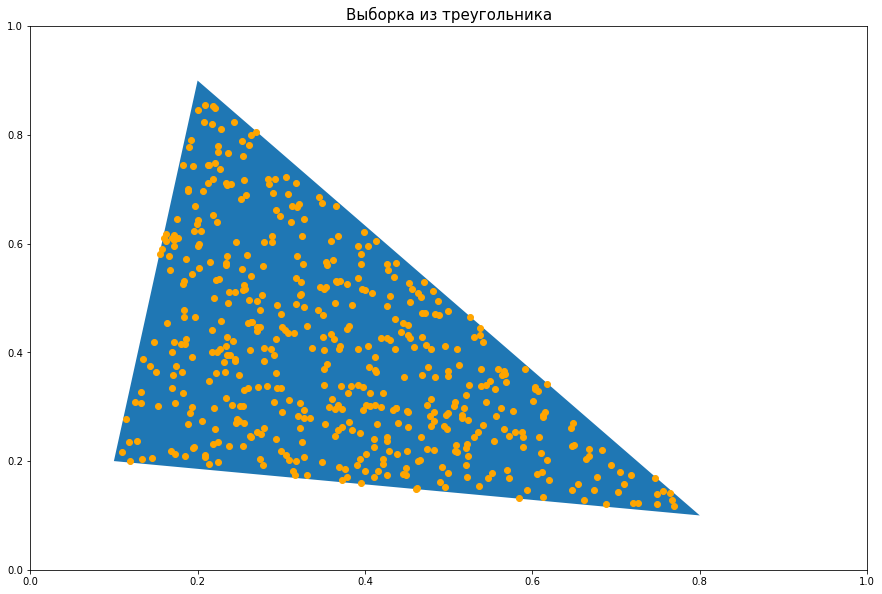

In [7]:
import math
xrand = np.array([np.random.rand() for i in range(500)])
yrand = np.array([np.random.rand() for i in range(500)])

for i in range(500):
    if yrand[i]>-xrand[i]+1:
        xrand[i]=-xrand[i]+1
        yrand[i]=-yrand[i]+1
        
xrand*=math.hypot(0.7, 0.1)
yrand*=math.hypot(0.7, 0.1)

a = math.atan2(-1, 7)
x = xrand
xrand = xrand*math.cos(a)-yrand*math.sin(a)+0.1
yrand = x*math.sin(a)+yrand*math.cos(a)+0.2

fig=plt.figure(figsize=(15,10))
polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.scatter(xrand, yrand, color='orange')
plt.xlim(left=0)
plt.xlim(right=1)
plt.ylim(bottom=0)
plt.ylim(top=1)
plt.title("Выборка из треугольника", size=15)
plt.show()

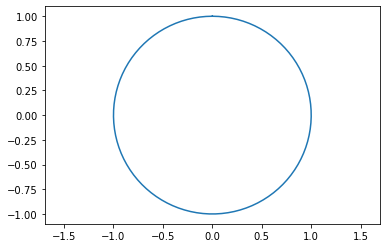

In [8]:
#Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

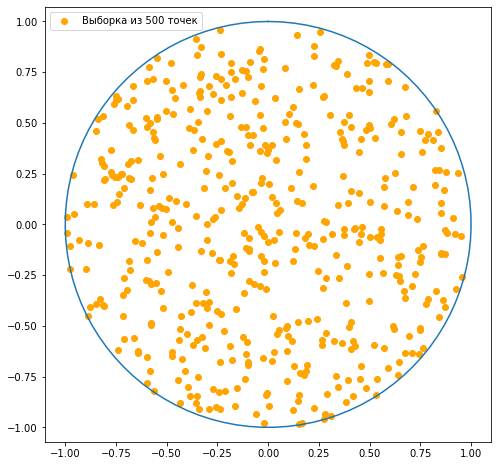

In [9]:
t = np.linspace(0, 2 * np.pi, 100)

anglerand = 2*np.pi*np.random.rand(1, 500)
radrand = np.sqrt(np.random.rand(1, 500))

xrand = radrand*np.cos(anglerand)
yrand = radrand*np.sin(anglerand)

fig = plt.figure(figsize=(8,8))
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.scatter(xrand, yrand, color='orange', label='Выборка из 500 точек')
plt.legend(loc='upper left')
plt.show()

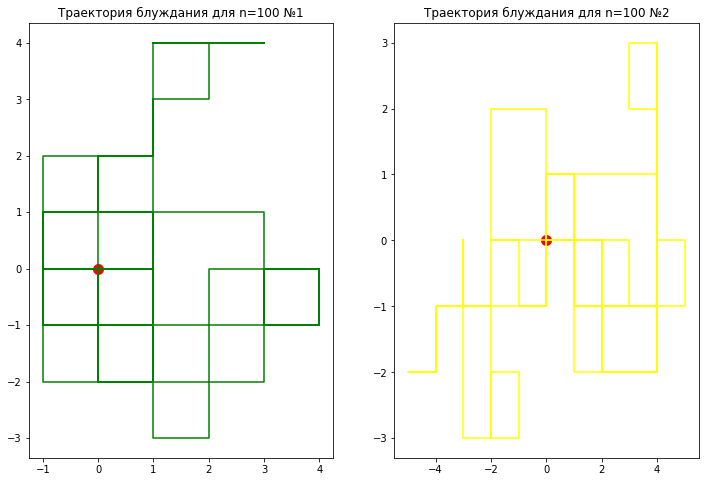

In [10]:
#Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0).
#Приведите графики выборочных траекторий для n=100.

def random_walk(n):
    X_index1 = np.random.choice(np.arange(n), n//2, replace = False)
    Y_index1 = np.random.choice(np.arange(n), n//2, replace = False)
    X_new_ind = np.ones(n)
    Y_new_ind = np.ones(n)
    X_new_ind[-X_index1] = -1
    Y_new_ind[-Y_index1] = -1
    X_new = np.cumsum(X_new_ind)
    Y_new = np.cumsum(Y_new_ind)
    X = (X_new+Y_new)/2
    Y = (X_new-Y_new)/2
    return X,Y

X, Y = random_walk(100)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(X,Y, color='green')
plt.title("Траектория блуждания для n=100 №1")
plt.scatter([0], [0], color='red', lw=5)
X, Y = random_walk(100)
plt.subplot(1,2,2)
plt.plot(X,Y,color='yellow')
plt.title("Траектория блуждания для n=100 №2")
plt.scatter([0], [0], color='red', lw=5)
plt.show()

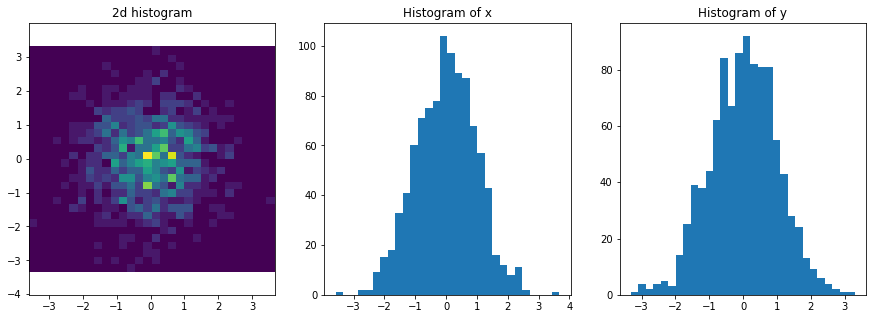

In [11]:
#Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин.
#Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos.
#С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6)
#и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

#Доказательство
Возьмем и посчитаем совместную плотность преобразованных величинx X = sqrt(-2ln(u1)) * cos(2*pi*u2),
Y = sqrt(-2ln(u1)*sin(2*pi*u2)). Нужно посчитать якобиан преобразования, обратить, выписать в терминах X, Y.
Получим как раз 1/(2*pi) * e^(-(X^2 + Y^2)/2). В итоге получим совместную плотность соответсвующую Гауссовскому многомерному
стандартному распределению. Это и доказывает утверждение.

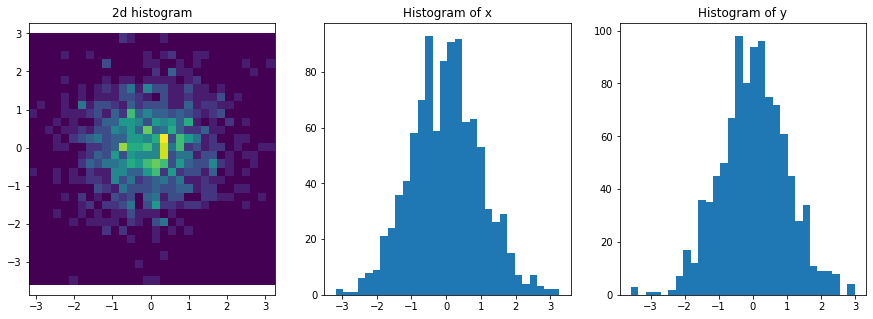

In [12]:
#без cos и sin
n = 1000
k = 0
X_0 = []
Y_0 = []
while k<n:
    a, b = 2*np.random.rand(2,1)-1
    s = a * a + b * b
    if 0 < s <= 1:
        X_0 = np.append(X_0, a)
        Y_0 = np.append(Y_0, b)
        k=k+1
s = X_0 * X_0 + Y_0 * Y_0
r = np.sqrt(-2 * np.log(s)/s)
X = X_0 * r
Y = Y_0 * r

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(X, Y, bins=30)
ax[0].axis('equal')
ax[1].hist(X, bins=30)
ax[2].hist(Y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

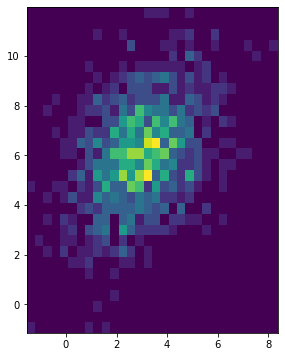

In [13]:
#Если X ~ N_2(a, Q), то AX+b ~ N_2(Aa + b, AQA^t)
#пусть A = ((a,b) , (c,d)), d выберем сами (так как 3 уравнения всего)
C = np.array([[2,1],[1,4]])
d = 2
c = np.sqrt(C[1][1] - d * d)
b = C[1][0] / d
a = np.sqrt(C[0][0] - b * b)

X_new = a * X + b * Y + 3
Y_new = c * X + d * Y + 6
plt.figure(figsize=(4.5,6))
plt.hist2d(X_new, Y_new, bins=30)
plt.show()

In [115]:
#Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним
#и заданной ниже ковариационно матрицей.
#Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])


L = np.zeros((9,9))
L[0][0] = math.sqrt(B[0][0])
for k in range(1, 9):
    L[k][0] = B[k][0] / L[0][0]
for i in range(1, 9):
    s0 = 0.0
    for p in range(i):
        s0 = s0 + L[i][p] * L[i][p]
    k0 = math.sqrt(B[i][i] - s0)
    L[i][i] = k0
    if i != 8:
        for j in range(i+1, 9):
            s1 = 0.0
            for p in range(i):
                s1 = s1 + L[i][p] * L[j][p]
            k1 = B[j][i] - s1
            if abs(L[i][i]) > 1e-15:
                L[j][i] = k1 / L[i][i]
            else:
                print(i,j, 'PROBLEM')
print('Искомая матрица L :')
print(L)
print('Реузльтирующая матрица ковариаций после преобразования вектора\n\
      с данной матрицей (полученная матрица ковариаций совпадает с заданной)')
F = L.dot(np.transpose(L))
print(F)

Искомая матрица L :
[[ 1.41421356  0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          2.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          2.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.         -0.5         0.          1.93649167  0.          0.
   0.          0.          0.        ]
 [-0.70710678  0.          0.          0.          1.22474487  0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          2.
   0.          0.          0.        ]
 [ 0.          0.         -0.5         0.          0.          0.
   1.93649167  0.          0.        ]
 [ 0.          0.          0.          0.          0.         -0.5
   0.          1.93649167  0.        ]
 [-0.70710678  0.          0.          0.         -1.22474487  0.
   0.          0.          0.        ]]
Реузльтирующая матрица ковариаций

In [168]:
#С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число  π .
#Теоретически обоснуйте необходимое число бросаний, чтобы оценить число  π  с точностью 3 знака после запятой
#и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний,
#чтобы достичь с требуемой достоверностью нужной точности.
N_MAX = 600000


x = []
for i in range (N_MAX):
    a, b = 2*np.random.rand(2, 1) - 1
    s = a * a + b * b
    if s <= 1:
        x = np.append(x, 0)
my_pi = 4.0 * len(x) / N_MAX
print(round(my_pi, 3))



3.143


Пусть величина X равна 1, если точка попала в круг, и 0 иначе. P{X=1} = p = pi/4, P{X=0} = q = 1 - pi/4.
EX = p, DX = p*q. Пусть Y - сумма N таких величин. Тогда  EY = N*p, DY = N*p*q. Z = Y / N.
EZ = p. DZ = p * q / N. По неравеству Чебышева имеем: P{|Z - EZ| > eps} < DZ / eps^2.
Тогда P{|Z - EZ| < eps} > 1 - DZ/ eps^2
N>= pi/4 * (1 - pi/4) / (delta * (eps/4)^2) = pi * (4 - pi)/ (delta * eps^2)
pi > 3. Тогда N >= 3/ (delta*eps^2)
delta = 0.01, eps = 0.0005. Тогда нам понадобится около 1.2 миллиарда бросков.
На практике думаю хватит где-то 700 - 800 тысяч бросков, но мой компьютер не позволяет это проверить
(дико лагает и очень долго считает)

In [181]:
#Реализовать метод генерации случайного разбиения n-элементного множества на подмножества.
#С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов
n = 100

#используем формулу Добинского
def subsets(n):
    Bells_number = 0
    x=[]
    for k in range(1,n):
        Bells_number+=k**n/np.math.factorial(k)
    Bells_number*=1/np.exp(1)
    part = np.array([k**n/(np.math.factorial(k)*np.exp(1)*Bells_number) for k in range(1,n+1)])
    summ_p = np.cumsum(part)
    
    r = np.random.rand()
    k=0
    while k!=-1:
        if r<summ_p[k]:
            r = k+1
            k=-1
        else:
            k+=1
    
    part = np.array([1/r for i in range(r)])
    summ_p = np.cumsum(part)
    a = np.array([np.random.rand() for i in range(n)])
    
    for i in range(n):
        k=0
        while k!=-1:
            if a[i]<summ_p[k]:
                x = np.append(x, k)
                k=-1
            else:
                k+=1
    return x

#ЗБЧ для оценивания количества (получилось 28-29)
mean_count = 0
for i in range(2000):
    x = subsets(n)
    mean_count += len(np.unique(x))
print(mean_count / 2000)

28.611
